In [ ]:
!pip install transformers

In [ ]:
!pip install huggingface_hub

In [ ]:
!pip install fasttext

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199770 sha256=4ab126b4d9e30fad21d49e5290568e58260950595c4395e5667fde5f3cbb2661
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
import glob
import pandas as pd
import csv
import re
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from transformers import AutoTokenizer, AutoModel, AdamW
import torch

import fasttext
from huggingface_hub import hf_hub_download
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import pandas as pd
import json

In [ ]:
def transform_column(df_column):
  scaler = MinMaxScaler()
  scores = np.array(df_column)
  scores = scores.reshape(-1,1)
  scaler.fit(scores)
  scores = scaler.transform(scores)
  scores = np.float32(scores)
  return scores

In [ ]:
model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)

def is_romanian_post(row):
  if model.predict(change_n_to_space(row["title"]))[0][0] == '__label__ron_Latn':
      return True
  return False

def change_n_to_space(text):
  return text.replace('\n', ' ')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.bin:   0%|          | 0.00/1.18G [00:00<?, ?B/s]

In [ ]:
df_romania = pd.read_json('Romania_submissions (1).json',orient='index')
df_romania = df_romania.reset_index()
df_romania = df_romania.rename(columns={'index':'title', 0:'content', 1: 'num_comments', 2:'score', 3:'date'})
df_romania['num_comments'] = transform_column(df_romania['num_comments'])
df_romania['score'] = transform_column(df_romania['score'])
df_romania

title  \
0      Romania declares witchcraft a profession, FINA...   
1      I'm an American who is about to Study Abroad i...   
2                             Dead birds were dead drunk   
3                       RObotzi - serial animat romanesc   
4      Parazi»õii - √én Jur (altƒÉ variantƒÉ dec√¢t cea de...   
...                                                  ...   
29995  Hai sa facem un exercitiu de democratie. Vreti...   
29996  [Rant] Prietenul m-a parasit din cauza religie...   
29997  Unui rom√¢n care nu s-a mai bƒÉrbierit din ianua...   
29998  Solu≈£ie tipic rom√¢neascƒÉ. Medicamentele fƒÉrƒÉ r...   
29999  Adrian NƒÉstase, ‚Äûmirat‚Äù cƒÉ i s-a retras viza d...   

                                                 content  num_comments  \
0                                                             0.013095   
1      I'll be attending Babes-Bolyai this coming sem...      0.020238   
2                                                             0.002381   
3                                                             0.010714   
4                                                             0.004762   
...                                                  ...           ...   
29995                                                         0.004762   
29996  Am avut un prieten timp de cateva zile de care...      0.164286   
29997                                                         0.000000   
29998                                                         0.004762   
29999                                                         0.000000   

          score                 date  
0      0.056034  2011-01-04 23:51:48  
1      0.036638  2011-01-06 07:31:18  
2      0.049569  2011-01-13 14:43:21  
3      0.032328  2011-01-24 02:26:07  
4      0.028017  2011-01-26 13:26:21  
...         ...                  ...  
29995  0.000000  2015-05-22 00:00:30  
29996  0.062500  2015-05-22 00:10:53  
29997  0.071121  2015-05-22 04:55:23  
29998  0.051724  2015-05-22 08:21:00  
29999  0.049569  2015-05-22 08:22:07  

[30000 rows x 5 columns]

In [ ]:
df_romania = df_romania[df_romania.apply(is_romanian_post, axis=1)]
df_romania['full_text'] = df_romania['title'] + ' ' + df_romania['content']
df_romania['sum_score'] = df_romania['num_comments'] + df_romania['score']
df_romania

<ipython-input-10-d26c9d8f3924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_romania['full_text'] = df_romania['title'] + ' ' + df_romania['content']
<ipython-input-10-d26c9d8f3924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_romania['sum_score'] = df_romania['num_comments'] + df_romania['score']


title  \
3                       RObotzi - serial animat romanesc   
4      Parazi»õii - √én Jur (altƒÉ variantƒÉ dec√¢t cea de...   
6      Muzica romaneasca.......Ce-au trecut anii........   
7      Muzica romaneasca de top-ce au trecut anii.......   
8                                   Grigorescu Eva Maria   
...                                                  ...   
29994  UE pare sƒÉ piardƒÉ lupta cu Rusia pentru Republ...   
29996  [Rant] Prietenul m-a parasit din cauza religie...   
29997  Unui rom√¢n care nu s-a mai bƒÉrbierit din ianua...   
29998  Solu≈£ie tipic rom√¢neascƒÉ. Medicamentele fƒÉrƒÉ r...   
29999  Adrian NƒÉstase, ‚Äûmirat‚Äù cƒÉ i s-a retras viza d...   

                                                 content  num_comments  \
3                                                             0.010714   
4                                                             0.004762   
6                                                             0.020238   
7                                                             0.004762   
8                                                             0.002381   
...                                                  ...           ...   
29994                                                         0.009524   
29996  Am avut un prieten timp de cateva zile de care...      0.164286   
29997                                                         0.000000   
29998                                                         0.004762   
29999                                                         0.000000   

          score                 date  \
3      0.032328  2011-01-24 02:26:07   
4      0.028017  2011-01-26 13:26:21   
6      0.034483  2011-01-30 23:46:30   
7      0.028017  2011-01-30 23:28:51   
8      0.008621  2011-02-01 01:37:08   
...         ...                  ...   
29994  0.043103  2015-05-21 23:40:49   
29996  0.062500  2015-05-22 00:10:53   
29997  0.071121  2015-05-22 04:55:23   
29998  0.051724  2015-05-22 08:21:00   
29999  0.049569  2015-05-22 08:22:07   

                                               full_text  sum_score  
3                      RObotzi - serial animat romanesc    0.043042  
4      Parazi»õii - √én Jur (altƒÉ variantƒÉ dec√¢t cea de...   0.032779  
6      Muzica romaneasca.......Ce-au trecut anii........   0.054721  
7      Muzica romaneasca de top-ce au trecut anii.......   0.032779  
8                                  Grigorescu Eva Maria    0.011002  
...                                                  ...        ...  
29994  UE pare sƒÉ piardƒÉ lupta cu Rusia pentru Republ...   0.052627  
29996  [Rant] Prietenul m-a parasit din cauza religie...   0.226786  
29997  Unui rom√¢n care nu s-a mai bƒÉrbierit din ianua...   0.071121  
29998  Solu≈£ie tipic rom√¢neascƒÉ. Medicamentele fƒÉrƒÉ r...   0.056486  
29999  Adrian NƒÉstase, ‚Äûmirat‚Äù cƒÉ i s-a retras viza d...   0.049569  

[23645 rows x 7 columns]

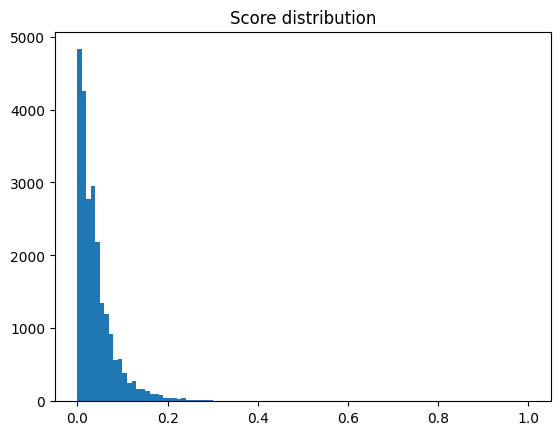

In [ ]:
plt.hist(df_romania['score'], bins=100)
plt.title('Score distribution')
plt.show()

In [ ]:
df_cluj = pd.read_json('cluj_submissions (1).json',orient='index')
df_cluj = df_cluj.reset_index()
df_cluj = df_cluj.rename(columns={'index':'title', 0:'content', 1: 'num_comments', 2:'score', 3:'date'})
df_cluj['num_comments'] = transform_column(df_cluj['num_comments'])
df_cluj['score'] = transform_column(df_cluj['score'])
df_cluj

title  \
0                            Gheorgheni, in seara asta   
1                   As a german, I cannot believe this   
2    Conversatie cu vecinul de jos pe care nici nu ...   
3    Buna ziua, suntem studenti UMF Medicina dentar...   
4                   Intre timp apartamentele din Cluj:   
..                                                 ...   
975  Cel mai curat,linistit, lipsit de poluare cart...   
976  Salutare! √émi pute»õi recomanda un ONG prin Clu...   
977                     Consultant financiar personal?   
978                Cum dau de un baiat de la Pata Rat?   
979  La 20000+ cazuri / zi, Dan Puric e tot ce avem...   

                                               content  num_comments  \
0                                                           0.248322   
1                                                           0.432886   
2                                                           0.412752   
3    Oferim urmƒÉtoarele servicii:\n-Consulta»õii\n-D...      0.312081   
4                                                           0.036913   
..                                                 ...           ...   
975                                                         0.120805   
976                                                         0.036913   
977  Tot ce gasesc pe google sunt firme de contabil...      0.083893   
978  Salut,\n\n&#x200B;\n\nStau in Mihai Viteazu si...      0.070470   
979                                                         0.020134   

        score                 date  
0    1.000000  2023-10-06 22:49:39  
1    0.762408  2022-10-01 20:03:37  
2    0.733896  2023-05-30 10:05:32  
3    0.665259  2023-10-12 09:11:34  
4    0.652587  2022-02-10 09:00:32  
..        ...                  ...  
975  0.001056  2022-08-23 20:44:32  
976  0.001056  2022-06-13 23:07:00  
977  0.001056  2022-01-30 08:44:03  
978  0.000000  2021-10-26 17:35:40  
979  0.000000  2021-09-28 14:21:43  

[980 rows x 5 columns]

In [ ]:
df_cluj = df_cluj[df_cluj.apply(is_romanian_post, axis=1)]
df_cluj['sum_score'] = df_cluj['num_comments'] + df_cluj['score']
df_cluj['full_text'] = df_cluj['title'] + ' ' + df_cluj['content']
df_cluj

<ipython-input-13-11ad1e4d8d16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluj['sum_score'] = df_cluj['num_comments'] + df_cluj['score']
<ipython-input-13-11ad1e4d8d16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluj['full_text'] = df_cluj['title'] + ' ' + df_cluj['content']


title  \
0                            Gheorgheni, in seara asta   
2    Conversatie cu vecinul de jos pe care nici nu ...   
3    Buna ziua, suntem studenti UMF Medicina dentar...   
4                   Intre timp apartamentele din Cluj:   
5                                           Ceva titlu   
..                                                 ...   
972         De ce proprietarii v√¢nd doar prin agen»õii?   
974  Cei care faceti sala, ce sala imi puteti recom...   
975  Cel mai curat,linistit, lipsit de poluare cart...   
976  Salutare! √émi pute»õi recomanda un ONG prin Clu...   
979  La 20000+ cazuri / zi, Dan Puric e tot ce avem...   

                                               content  num_comments  \
0                                                           0.248322   
2                                                           0.412752   
3    Oferim urmƒÉtoarele servicii:\n-Consulta»õii\n-D...      0.312081   
4                                                           0.036913   
5                                                           0.093960   
..                                                 ...           ...   
972  CƒÉut√¢nd prin anun»õurile imobiliare observ cƒÉ 9...      0.154362   
974  As vrea sa ma apuc si eu de sala si nu stiu la...      0.255034   
975                                                         0.120805   
976                                                         0.036913   
979                                                         0.020134   

        score                 date  sum_score  \
0    1.000000  2023-10-06 22:49:39   1.248322   
2    0.733896  2023-05-30 10:05:32   1.146648   
3    0.665259  2023-10-12 09:11:34   0.977339   
4    0.652587  2022-02-10 09:00:32   0.689500   
5    0.616684  2022-11-18 12:37:28   0.710644   
..        ...                  ...        ...   
972  0.001056  2022-10-01 19:07:24   0.155418   
974  0.001056  2022-08-27 17:32:24   0.256090   
975  0.001056  2022-08-23 20:44:32   0.121861   
976  0.001056  2022-06-13 23:07:00   0.037969   
979  0.000000  2021-09-28 14:21:43   0.020134   

                                             full_text  
0                           Gheorgheni, in seara asta   
2    Conversatie cu vecinul de jos pe care nici nu ...  
3    Buna ziua, suntem studenti UMF Medicina dentar...  
4                  Intre timp apartamentele din Cluj:   
5                                          Ceva titlu   
..                                                 ...  
972  De ce proprietarii v√¢nd doar prin agen»õii? CƒÉu...  
974  Cei care faceti sala, ce sala imi puteti recom...  
975  Cel mai curat,linistit, lipsit de poluare cart...  
976  Salutare! √émi pute»õi recomanda un ONG prin Clu...  
979  La 20000+ cazuri / zi, Dan Puric e tot ce avem...  

[749 rows x 7 columns]

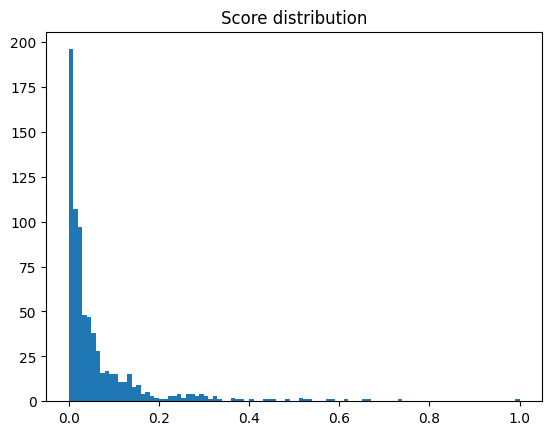

In [ ]:
plt.hist(df_cluj['score'], bins=100)
plt.title('Score distribution')
plt.show()

In [ ]:
df_bucuresti = pd.read_json('bucuresti_submissions (1).json',orient='index')
df_bucuresti = df_bucuresti.reset_index()
df_bucuresti = df_bucuresti.rename(columns={'index':'title', 0:'content', 1: 'num_comments', 2:'score', 3:'date'})
df_bucuresti['num_comments'] = transform_column(df_bucuresti['num_comments'])
df_bucuresti['score'] = transform_column(df_bucuresti['score'])
df_bucuresti

title  \
0                  Help Finding Vaguely Described Place   
1                             Looking for a shisha shop   
2     Consiliul General al Municipiului Bucure»ôti a ...   
3                                            Need Help!   
4     Dutch soccer team looking for friendly match i...   
...                                                 ...   
2910                                      CƒÉlugƒÉri»õe...   
2911  "Mi-a spus foarte clar, 150 lei/km". »òoferii d...   
2912                                        PovestioarƒÉ   
2913  Acum 5 zile v-am scris despre situatia unui tr...   
2914  Aleile din HerƒÉstrƒÉu sunt la un pas de prƒÉbu»ôi...   

                                                content  num_comments  \
0     "Long story short, I've found recently that in...      0.005780   
1     I just moved to Bucharest and I'm a big shisha...      0.009634   
2     Alte douƒÉ linii de tramvai din Bucure»ôti vor f...      0.001927   
3     Hello, \n\nMe and some friends are visiting Bu...      0.005780   
4     We are a Dutch amateur soccer team visiting Bu...      0.001927   
...                                                 ...           ...   
2910  Care e treaba cu cƒÉlugƒÉri»õele, »ôi ma refer la ...      0.069364   
2911                                                         0.042389   
2912   Ma scuza»õi pentru lunga poveste care urmeazƒÉ....      0.001927   
2913                                                         0.023121   
2914                                                         0.028902   

         score                 date  
0     0.000880  2018-01-08 15:33:19  
1     0.000880  2018-01-17 15:00:13  
2     0.001759  2018-03-28 15:17:54  
3     0.000000  2018-04-01 15:23:38  
4     0.001759  2018-04-06 12:30:03  
...        ...                  ...  
2910  0.036060  2023-08-27 22:36:48  
2911  0.034301  2023-08-20 09:02:23  
2912  0.035180  2023-06-30 18:48:06  
2913  0.033421  2023-05-25 10:13:23  
2914  0.036060  2023-04-19 12:43:35  

[2915 rows x 5 columns]

In [ ]:
df_bucuresti = df_bucuresti[df_bucuresti.apply(is_romanian_post, axis=1)]
df_bucuresti['sum_score'] = df_bucuresti['num_comments'] + df_bucuresti['score']
df_bucuresti['full_text'] = df_bucuresti['title'] + ' ' + df_bucuresti['content']
df_bucuresti

<ipython-input-16-5a72ba73a645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bucuresti['sum_score'] = df_bucuresti['num_comments'] + df_bucuresti['score']
<ipython-input-16-5a72ba73a645>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bucuresti['full_text'] = df_bucuresti['title'] + ' ' + df_bucuresti['content']


title  \
2     Consiliul General al Municipiului Bucure»ôti a ...   
12         Harta magazinelor de biciclism din Bucuresti   
15           Turista pentru 2 zile/ looking for a guide   
16                             Giulesti miroase a rahat   
21                       Tractare Autovehicul Bucuresti   
...                                                 ...   
2910                                      CƒÉlugƒÉri»õe...   
2911  "Mi-a spus foarte clar, 150 lei/km". »òoferii d...   
2912                                        PovestioarƒÉ   
2913  Acum 5 zile v-am scris despre situatia unui tr...   
2914  Aleile din HerƒÉstrƒÉu sunt la un pas de prƒÉbu»ôi...   

                                                content  num_comments  \
2     Alte douƒÉ linii de tramvai din Bucure»ôti vor f...      0.001927   
12                            https://imgur.com/iSzwLtR      0.011561   
15    Salut. Stau in Bucure»ôti pentru urmƒÉtoarele 2 ...      0.001927   
16    Hey! De cateva zile in zona Giulesti abia se p...      0.013487   
21    Salut,\n\nPoate cineva sa-mi recomande o firma...      0.001927   
...                                                 ...           ...   
2910  Care e treaba cu cƒÉlugƒÉri»õele, »ôi ma refer la ...      0.069364   
2911                                                         0.042389   
2912   Ma scuza»õi pentru lunga poveste care urmeazƒÉ....      0.001927   
2913                                                         0.023121   
2914                                                         0.028902   

         score                 date  sum_score  \
2     0.001759  2018-03-28 15:17:54   0.003686   
12    0.004398  2018-06-28 18:16:55   0.015958   
15    0.000880  2018-07-16 20:44:40   0.002806   
16    0.003518  2018-07-17 07:37:10   0.017006   
21    0.002639  2018-08-18 12:35:02   0.004565   
...        ...                  ...        ...   
2910  0.036060  2023-08-27 22:36:48   0.105424   
2911  0.034301  2023-08-20 09:02:23   0.076690   
2912  0.035180  2023-06-30 18:48:06   0.037107   
2913  0.033421  2023-05-25 10:13:23   0.056543   
2914  0.036060  2023-04-19 12:43:35   0.064962   

                                              full_text  
2     Consiliul General al Municipiului Bucure»ôti a ...  
12    Harta magazinelor de biciclism din Bucuresti h...  
15    Turista pentru 2 zile/ looking for a guide Sal...  
16    Giulesti miroase a rahat Hey! De cateva zile i...  
21    Tractare Autovehicul Bucuresti Salut,\n\nPoate...  
...                                                 ...  
2910  CƒÉlugƒÉri»õe... Care e treaba cu cƒÉlugƒÉri»õele, »ô...  
2911  "Mi-a spus foarte clar, 150 lei/km". »òoferii d...  
2912  PovestioarƒÉ  Ma scuza»õi pentru lunga poveste c...  
2913  Acum 5 zile v-am scris despre situatia unui tr...  
2914  Aleile din HerƒÉstrƒÉu sunt la un pas de prƒÉbu»ôi...  

[2113 rows x 7 columns]

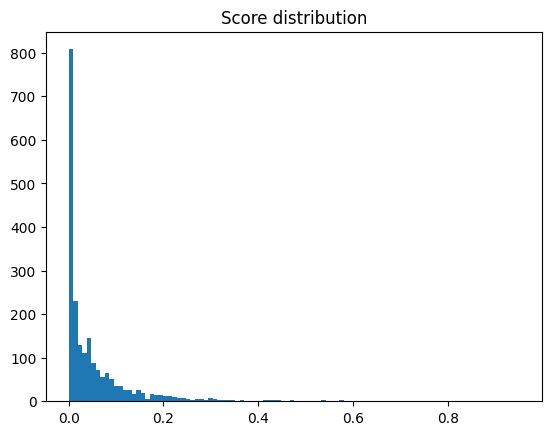

In [ ]:
plt.hist(df_bucuresti['score'], bins=100)
plt.title('Score distribution')
plt.show()

In [ ]:
df_iasi = pd.read_json('iasi_submissions (1).json',orient='index')
df_iasi = df_iasi.reset_index()
df_iasi = df_iasi.rename(columns={'index':'title', 0:'content', 1: 'num_comments', 2:'score', 3:'date'})
df_iasi['num_comments'] = transform_column(df_iasi['num_comments'])
df_iasi['score'] = transform_column(df_iasi['score'])
df_iasi

title  \
0                Daca dispar, continuati ce am inceput   
1                       De unde tot apar vacile astea?   
2    Am gasit pisica! Va multumesc mult tuturor! A ...   
3       O bijuterie intr-o parcare din Iasi. Va place?   
4           Vanzare de vape-uri cu nicotina minorilor.   
..                                                 ...   
959  Pe 9 septembrie se organizeaza o noua editie A...   
960                   Clinica medicala de la USV Iasi?   
961                                    SesizƒÉri online   
962                                       Casa in Iasi   
963                             PƒÉrere INIMO Ia»ôi 2023   

                                               content  num_comments  \
0                                                           0.153086   
1                                                           0.217284   
2                                                           0.061728   
3                                                           0.051852   
4    Ia»ôi, zona Palas, chiar √Æn fa»õa hotelului Mold...      0.204938   
..                                                 ...           ...   
959                                                         0.000000   
960  Buna. A fost cineva cu animalutul la clinica m...      0.046914   
961  Salutare! \nA folosit cineva (cu succes) pagin...      0.049383   
962  Nu stiu daca asta este locul potrivit but Im g...      0.044444   
963  Salut. Ieri am decis sa urc pe Copou pentru a ...      0.177778   

        score                 date  
0    1.000000  2023-09-14 17:41:55  
1    0.855422  2023-09-22 17:12:39  
2    0.561747  2023-03-26 21:14:54  
3    0.548193  2022-04-23 17:08:13  
4    0.540663  2023-09-18 23:51:17  
..        ...                  ...  
959  0.001506  2023-09-06 16:55:05  
960  0.003012  2023-08-31 11:45:34  
961  0.001506  2023-08-30 17:10:46  
962  0.000000  2023-08-29 14:55:34  
963  0.001506  2023-08-20 14:39:52  

[964 rows x 5 columns]

In [ ]:
df_iasi = df_iasi[df_iasi.apply(is_romanian_post, axis=1)]
df_iasi['sum_score'] = df_iasi['num_comments'] + df_iasi['score']
df_iasi['full_text'] = df_iasi['title'] + ' ' + df_iasi['content']
df_iasi

<ipython-input-19-d4e5fc40c200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iasi['sum_score'] = df_iasi['num_comments'] + df_iasi['score']
<ipython-input-19-d4e5fc40c200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iasi['full_text'] = df_iasi['title'] + ' ' + df_iasi['content']


title  \
0                Daca dispar, continuati ce am inceput   
1                       De unde tot apar vacile astea?   
2    Am gasit pisica! Va multumesc mult tuturor! A ...   
3       O bijuterie intr-o parcare din Iasi. Va place?   
4           Vanzare de vape-uri cu nicotina minorilor.   
..                                                 ...   
955                   CumpƒÉrat apartament fƒÉrƒÉ agen»õii   
959  Pe 9 septembrie se organizeaza o noua editie A...   
960                   Clinica medicala de la USV Iasi?   
961                                    SesizƒÉri online   
963                             PƒÉrere INIMO Ia»ôi 2023   

                                               content  num_comments  \
0                                                           0.153086   
1                                                           0.217284   
2                                                           0.061728   
3                                                           0.051852   
4    Ia»ôi, zona Palas, chiar √Æn fa»õa hotelului Mold...      0.204938   
..                                                 ...           ...   
955  Salutare!\n\nAm »ôi eu de g√¢nd sƒÉ cumpƒÉr un apa...      0.019753   
959                                                         0.000000   
960  Buna. A fost cineva cu animalutul la clinica m...      0.046914   
961  Salutare! \nA folosit cineva (cu succes) pagin...      0.049383   
963  Salut. Ieri am decis sa urc pe Copou pentru a ...      0.177778   

        score                 date  sum_score  \
0    1.000000  2023-09-14 17:41:55   1.153086   
1    0.855422  2023-09-22 17:12:39   1.072706   
2    0.561747  2023-03-26 21:14:54   0.623475   
3    0.548193  2022-04-23 17:08:13   0.600045   
4    0.540663  2023-09-18 23:51:17   0.745601   
..        ...                  ...        ...   
955  0.001506  2023-09-22 17:27:53   0.021259   
959  0.001506  2023-09-06 16:55:05   0.001506   
960  0.003012  2023-08-31 11:45:34   0.049926   
961  0.001506  2023-08-30 17:10:46   0.050889   
963  0.001506  2023-08-20 14:39:52   0.179284   

                                             full_text  
0               Daca dispar, continuati ce am inceput   
1                      De unde tot apar vacile astea?   
2    Am gasit pisica! Va multumesc mult tuturor! A ...  
3      O bijuterie intr-o parcare din Iasi. Va place?   
4    Vanzare de vape-uri cu nicotina minorilor. Ia»ô...  
..                                                 ...  
955  CumpƒÉrat apartament fƒÉrƒÉ agen»õii Salutare!\n\n...  
959  Pe 9 septembrie se organizeaza o noua editie A...  
960  Clinica medicala de la USV Iasi? Buna. A fost ...  
961  SesizƒÉri online Salutare! \nA folosit cineva (...  
963  PƒÉrere INIMO Ia»ôi 2023 Salut. Ieri am decis sa...  

[812 rows x 7 columns]

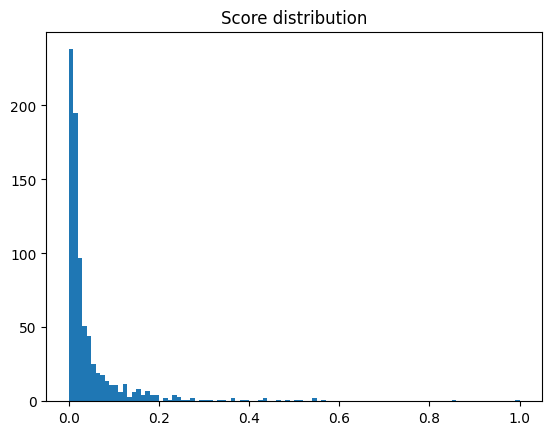

In [ ]:
plt.hist(df_iasi['score'], bins=100)
plt.title('Score distribution')
plt.show()

In [ ]:
df_timisoara = pd.read_json('timisoara_submissions (1).json',orient='index')
df_timisoara = df_timisoara.reset_index()
df_timisoara = df_timisoara.rename(columns={'index':'title', 0:'content', 1: 'num_comments', 2:'score', 3:'date'})
df_timisoara['num_comments'] = transform_column(df_timisoara['num_comments'])
df_timisoara['score'] = transform_column(df_timisoara['score'])
df_timisoara

title  \
0    Steag LGBT l√¢ngƒÉ steagul Rom√¢niei la noul IKEA...   
1                                  Uite ca se poate!!!   
2    √én caz cƒÉ vre»õi sƒÉ vƒÉ angaja»õi la New Yorker √Æ...   
3    Timi»ôoara o sƒÉ devinƒÉ mai verde, modernƒÉ »ôi ma...   
4                                     De ce downgrade?   
..                                                 ...   
973                                    Escape tonight?   
974                           Spatiu munca remote 1 zi   
975  Stie cineva o locatie de unde se pot inchiria ...   
976  PUZ in dezbatere publica a zonei dintre str Oi...   
977                                  Accesorii Mobila.   

                                               content  num_comments  \
0                                              PƒÉreri?      1.000000   
1                                                           0.065649   
2    Mi-am dat azi demisia »ôi aici am o listƒÉ de mo...      0.254962   
3                                                           0.178626   
4               Aveam »ôi noi o f√¢nt√¢nƒÉ fain decoratƒÉ üòë      0.065649   
..                                                 ...           ...   
973                                                         0.016794   
974  Salut. Ma voi afla vineri in Timi»ôoara si am n...      0.018321   
975                                                         0.007634   
976                                                         0.000000   
977  Aveti idee unde se mai gasesc magazine cu acce...      0.022901   

        score                 date  
0    1.000000  2023-05-17 10:59:12  
1    0.771580  2023-09-25 13:47:47  
2    0.709163  2023-08-31 02:16:38  
3    0.622842  2023-10-16 18:08:04  
4    0.564409  2023-06-05 14:48:18  
..        ...                  ...  
973  0.001328  2023-04-01 18:27:49  
974  0.000000  2023-03-21 06:52:51  
975  0.002656  2023-03-15 11:34:27  
976  0.001328  2023-03-14 16:53:02  
977  0.000000  2023-03-14 11:51:43  

[978 rows x 5 columns]

In [ ]:
df_timisoara = df_timisoara[df_timisoara.apply(is_romanian_post, axis=1)]
df_timisoara['sum_score'] = df_timisoara['num_comments'] + df_timisoara['score']
df_timisoara['full_text'] = df_timisoara['title'] + ' ' + df_timisoara['content']
df_timisoara

<ipython-input-22-808a8cc14776>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timisoara['sum_score'] = df_timisoara['num_comments'] + df_timisoara['score']
<ipython-input-22-808a8cc14776>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timisoara['full_text'] = df_timisoara['title'] + ' ' + df_timisoara['content']


title  \
0    Steag LGBT l√¢ngƒÉ steagul Rom√¢niei la noul IKEA...   
1                                  Uite ca se poate!!!   
2    √én caz cƒÉ vre»õi sƒÉ vƒÉ angaja»õi la New Yorker √Æ...   
3    Timi»ôoara o sƒÉ devinƒÉ mai verde, modernƒÉ »ôi ma...   
5                            Soferii de la Tucano Cafe   
..                                                 ...   
970                   Locuri de muncƒÉ - limba polonezƒÉ   
971   Recomandare firma de curatenie/femeie de servici   
972  NouƒÉ galerie comercialƒÉ √Æn construc»õie la intr...   
975  Stie cineva o locatie de unde se pot inchiria ...   
976  PUZ in dezbatere publica a zonei dintre str Oi...   

                                               content  num_comments  \
0                                              PƒÉreri?      1.000000   
1                                                           0.065649   
2    Mi-am dat azi demisia »ôi aici am o listƒÉ de mo...      0.254962   
3                                                           0.178626   
5                                                           0.105344   
..                                                 ...           ...   
970  Hello! Poate mƒÉ pute»õi ajuta cu o sugestie. Av...      0.009160   
971  As avea nevoie de ajutor pt spalat geamuri + c...      0.007634   
972                                                         0.004580   
975                                                         0.007634   
976                                                         0.000000   

        score                 date  sum_score  \
0    1.000000  2023-05-17 10:59:12   2.000000   
1    0.771580  2023-09-25 13:47:47   0.837229   
2    0.709163  2023-08-31 02:16:38   0.964125   
3    0.622842  2023-10-16 18:08:04   0.801468   
5    0.416999  2023-05-05 18:26:17   0.522342   
..        ...                  ...        ...   
970  0.001328  2023-04-20 12:57:35   0.010488   
971  0.001328  2023-04-04 22:22:20   0.008962   
972  0.000000  2023-04-03 04:46:58   0.004580   
975  0.002656  2023-03-15 11:34:27   0.010290   
976  0.001328  2023-03-14 16:53:02   0.001328   

                                             full_text  
0    Steag LGBT l√¢ngƒÉ steagul Rom√¢niei la noul IKEA...  
1                                 Uite ca se poate!!!   
2    √én caz cƒÉ vre»õi sƒÉ vƒÉ angaja»õi la New Yorker √Æ...  
3    Timi»ôoara o sƒÉ devinƒÉ mai verde, modernƒÉ »ôi ma...  
5                           Soferii de la Tucano Cafe   
..                                                 ...  
970  Locuri de muncƒÉ - limba polonezƒÉ Hello! Poate ...  
971  Recomandare firma de curatenie/femeie de servi...  
972  NouƒÉ galerie comercialƒÉ √Æn construc»õie la intr...  
975  Stie cineva o locatie de unde se pot inchiria ...  
976  PUZ in dezbatere publica a zonei dintre str Oi...  

[788 rows x 7 columns]

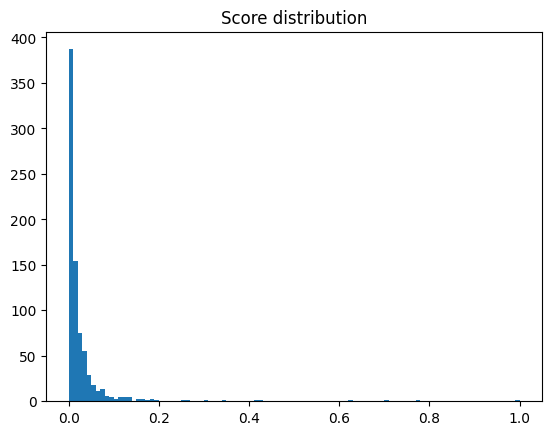

In [ ]:
plt.hist(df_timisoara['score'], bins=100)
plt.title('Score distribution')
plt.show()

In [ ]:
df_train = df_romania
df_test = pd.concat([df_cluj, df_iasi, df_timisoara], ignore_index=True)
df_validation = pd.concat([df_bucuresti], ignore_index=True)

In [ ]:
# Load the dataset into a pandas dataframe.

df_train = shuffle(df_train)
df_validation = shuffle(df_validation)
df_test = shuffle(df_test)

print('Number of training sentences: {:,}\n'.format(df_train.shape[0]))
print('Number of validation sentences: {:,}\n'.format(df_validation.shape[0]))
print('Number of test sentences: {:,}\n'.format(df_test.shape[0]))

# Display 10 random rows from the data.
df_train.sample(10)

Number of training sentences: 23,645

Number of validation sentences: 2,113

Number of test sentences: 2,349



title  \
7988                Sare acum cu 51% mai putina sare ...   
25426            Un britanic a furat po»ôeta unei rom√¢nce   
17334  Citeva observatii despre campania electorala s...   
21700  Klaus Iohannis »ôi-a ales »ôeful cancelariei pre...   
15197                 Starbucks filtreaza accesul la net   
5273   ¬´Filmele istorice rom√¢ne≈üti sunt pline de minc...   
27650    Nahh ... cred ca mi se pare ca seamana doar mie   
29235  Un bƒÉrbat a primit bon fiscal pentru bacsisul ...   
26814  Apropiat al Elenei Udrea, condamnat la ≈üapte a...   
14524  LuptƒÉ pentru putere √Æn Portul Constan≈£a. Guver...   

                                                 content  num_comments  \
7988                                                          0.013095   
25426                                                         0.011905   
17334                                                         0.001190   
21700                                                         0.011905   
15197  &gt; Accesul_la_aceasta_pagina_web_a_fost_rest...      0.028571   
5273                                                          0.041667   
27650                                                         0.004762   
29235                                                         0.002381   
26814                                                         0.000000   
14524                                                         0.000000   

          score                 date  \
7988   0.094828  2013-07-26 14:18:21   
25426  0.081897  2015-02-20 22:18:30   
17334  0.008621  2014-08-21 14:07:59   
21700  0.012931  2014-11-26 15:34:09   
15197  0.047414  2014-06-09 09:18:50   
5273   0.040948  2013-01-04 15:59:12   
27650  0.002155  2015-04-05 12:10:05   
29235  0.015086  2015-05-07 12:02:24   
26814  0.015086  2015-03-20 17:21:49   
14524  0.017241  2014-05-16 16:06:49   

                                               full_text  sum_score  
7988               Sare acum cu 51% mai putina sare ...    0.107923  
25426           Un britanic a furat po»ôeta unei rom√¢nce    0.093801  
17334  Citeva observatii despre campania electorala s...   0.009811  
21700  Klaus Iohannis »ôi-a ales »ôeful cancelariei pre...   0.024836  
15197  Starbucks filtreaza accesul la net &gt; Accesu...   0.075985  
5273   ¬´Filmele istorice rom√¢ne≈üti sunt pline de minc...   0.082615  
27650   Nahh ... cred ca mi se pare ca seamana doar mie    0.006917  
29235  Un bƒÉrbat a primit bon fiscal pentru bacsisul ...   0.017467  
26814  Apropiat al Elenei Udrea, condamnat la ≈üapte a...   0.015086  
14524  LuptƒÉ pentru putere √Æn Portul Constan≈£a. Guver...   0.017241

In [ ]:
# Get the lists of contents and their labels.

### TRAIN ###
contents_train = df_train.full_text.values
median_score = np.median(df_train.score.values)
labels_train = np.where(df_train.score.values > median_score, 1, 0)

### VALIDATION ###
contents_validation = df_validation.full_text.values
median_score = np.median(df_validation.score.values)
labels_validation = np.where(df_validation.score.values > median_score, 1, 0)

### TEST ###
contents_test = df_test.full_text.values
median_score = np.median(df_test.score.values)
labels_test = np.where(df_test.score.values > median_score, 1, 0)

In [ ]:
def clean_text (text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text

contents_train = [clean_text(text) for text in contents_train]
contents_validation = [clean_text(text) for text in contents_validation]
contents_test = [clean_text(text) for text in contents_test]


In [ ]:
# fasttext embeddings for the dataset
! pip install pandas numpy scikit-learn gensim nltk

# Tokenization using nltk

import nltk

nltk.download('punkt')
from gensim.models import FastText
from nltk.tokenize import word_tokenize

print("TRAIN")
# Print the original sentence.
print(' Original: ', contents_train[0])
contents_train_tokenized = [word_tokenize(text) for text in contents_train]
print (contents_train_tokenized[0])

print("VALIDATION")
# Print the original sentence.
print(' Original: ', contents_validation[0])
contents_validation_tokenized = [word_tokenize(text) for text in contents_validation]
print (contents_validation_tokenized[0])

print("TEST")
# Print the original sentence.
print(' Original: ', contents_test[0])
contents_test_tokenized = [word_tokenize(text) for text in contents_test]
print (contents_test_tokenized[0])

# Train FastText model
fasttext_model = FastText(sentences=contents_train_tokenized, vector_size=300, window=3, min_count=1, workers=4, sg=1)

# Generate embeddings for training, validation, and test sets
def generate_embeddings(contents_tokenized):
    embeddings = []
    for text in contents_tokenized:
        # Calculate the mean of word vectors for each text
        text_vector = np.mean([fasttext_model.wv[word] for word in text if word in fasttext_model.wv] or [np.zeros(300)], axis=0)
        embeddings.append(text_vector)
    embeddings = np.array(embeddings)
    return embeddings

embeddings_train = generate_embeddings(contents_train_tokenized)
embeddings_validation = generate_embeddings(contents_validation_tokenized)
embeddings_test = generate_embeddings(contents_test_tokenized)

# print the shape of the embeddings
print(embeddings_train.shape)
print(embeddings_validation.shape)
print(embeddings_test.shape)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


TRAIN
 Original:  am vreo 11 invite uri dota2 pentru cine vrea si nu are sunt atat de minunat ca le dau gratis la urma urmei cica costa 28 de euro http store steampowered com app 570 edit tot le dau dar imi recitesc titlul si ma simt cat de cat penibil nu sterg dar subliniez berile pe care le am baut de a cursul serii nu ma scuz au fost bune dar mi se invarte camera n juru capului si scriu incredibil de corect e ceva deosebit hai sa facem tinychat edit2 ma bat pe spate pentru hyperlink ul ala de acu un edit m am tarat in pat dar capacitatiile mele de html de clasa a 10 a ma surprind continuu edit3 am uitat sa mentionez azi am fost la politie sa mi refac buletinul pentru ca s matur acum problema e ca mi au luat prezentul buletin si acum il astept pe cel nou peste o saptamana marea problema e ca n am dovada sau copie dupa buletin deci evident ca prau de beat pe drum spre casa ma opreste politia pentru prima oara in viata mea ca sa ma legitimze dintr o masina care nu era de politie si evi

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

def compute_metrics(y_pred, y_true):

  y_pred = y_pred.flatten()
  macro_f1 = f1_score(y_true, y_pred, average='macro')
  # Popular - label 1
  TP_pop = 0 # y_true = 1 si y_pred = 1
  FP_pop = 0 # y_true = 0 si y_pred = 1
  FN_pop = 0 # y_true = 1 si y_pred = 0
  # Unpopular - label 0
  TP_unpop = 0 # y_true = 0 si y_pred = 0
  FP_unpop = 0 # y_true = 1 si y_pred = 0
  FN_unpop = 0 # y_true = 0 si y_pred = 1
  n = len(y_pred)
  for index in range(n):
    # Popular
    if y_true[index] == 1:
      if y_pred[index] == 1:
        TP_pop += 1
      if y_pred[index] == 0:
        FN_pop += 1
        FP_unpop += 1
    else:
    # Unpopular y_true[index] == 0
      if y_pred[index] == 0:
        TP_unpop += 1
      if y_pred[index] == 1:
        FN_unpop += 1
        FP_pop += 1

  P_pop = 0 if TP_pop + FP_pop == 0 else TP_pop / (TP_pop + FP_pop)
  R_pop = 0 if TP_pop + FN_pop == 0 else TP_pop / (TP_pop + FN_pop)
  P_unpop = 0 if TP_unpop + FP_unpop == 0 else TP_unpop / (TP_unpop + FP_unpop)
  R_unpop = 0 if TP_unpop + FN_unpop == 0 else TP_unpop / (TP_unpop + FN_unpop)

  return (macro_f1, P_pop, R_pop, P_unpop, R_unpop)

In [ ]:
#train svm model
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

average_training_loss = []

clf = SVC(kernel='linear', C=10)
clf.fit(embeddings_train, labels_train)

# Predict on training set
train_predictions = clf.predict(embeddings_train)

# Calculate training accuracy
training_accuracy = accuracy_score(labels_train, train_predictions)


# evaluate using compute_metrics function

# Predict on validation set
predictions_validation = clf.predict(embeddings_validation)

predicts_validation_reshaped = np.array(predictions_validation).reshape(len (labels_validation), 1)

macro_f1, P_popular, R_popular, P_unpopular, R_unpopular = compute_metrics(predicts_validation_reshaped, labels_validation)
accuracy_validation = accuracy_score(labels_validation, predicts_validation_reshaped)
print("VALIDATION")
print("Accuracy: ", accuracy_validation)
print("Macro F1: ", macro_f1)
print("Popular class: ")
print("Precision: ", P_popular)
print("Recall: ", R_popular)
print("Unpopular class: ")
print("Precision: ", P_unpopular)
print("Recall: ", R_unpopular)

VALIDATION
Accuracy:  0.6677709417889257
Macro F1:  0.6624619073105196
Popular class: 
Precision:  0.7225725094577553
Recall:  0.543127962085308
Unpopular class: 
Precision:  0.6348484848484849
Recall:  0.7920604914933838


In [ ]:
# Prediction on test set

predictions_test = clf.predict(embeddings_test)

predicts_test_reshaped = np.array(predictions_test).reshape(len(labels_test), 1)

macro_f1, P_popular, R_popular, P_unpopular, R_unpopular = compute_metrics(predicts_test_reshaped, labels_test)
accuracy_test = accuracy_score(labels_test, predicts_test_reshaped)

print("TEST")
print("Accuracy:", accuracy_test)
print("Macro F1: ", macro_f1)
print("Popular class: ")
print("Precision: ", P_popular)
print("Recall: ", R_popular)
print("Unpopular class: ")
print("Precision: ", P_unpopular)
print("Recall: ", R_unpopular)

TEST
Accuracy: 0.5644955300127714
Macro F1:  0.5637048252106422
Popular class: 
Precision:  0.5583398590446359
Recall:  0.6083617747440273
Unpopular class: 
Precision:  0.5718283582089553
Recall:  0.5208156329651656


Example  0
Label:  0
Prediction:  0
Text:  reparatii ecrane buna am si eu o intrebare am un ecran mionitor dell s2721hn care din pacate a fost lovit fix in mijloc si sa stricat cred ca deja stiti cum arata un ecran cand arunci cu o maneta de playstation in el hahaeram curios este posibil sa l repar pe undeva sau acuma o mai tin degeaba edit am uitat sa apas shift cand am apasat enter mai voiam sa spun si un multumesc anticipat 3
Words with highest weights: 
         words   weights
180       edit  2.494270
9           sa  2.230300
298       deja  1.824824
16          am  0.871391
85        cand  0.660840
17          ca  0.372937
18         mai  0.347753
8           pe -0.044673
10          cu -0.115635
29        este -0.122125
5           in -0.146870
13         din -0.398241
0           de -0.765735
15        care -0.843456
14          un -0.947252
76           3 -0.993824
32        fost -1.099879
6           si -1.200422
276  multumesc -1.488340
166       cred -1.699339
12           

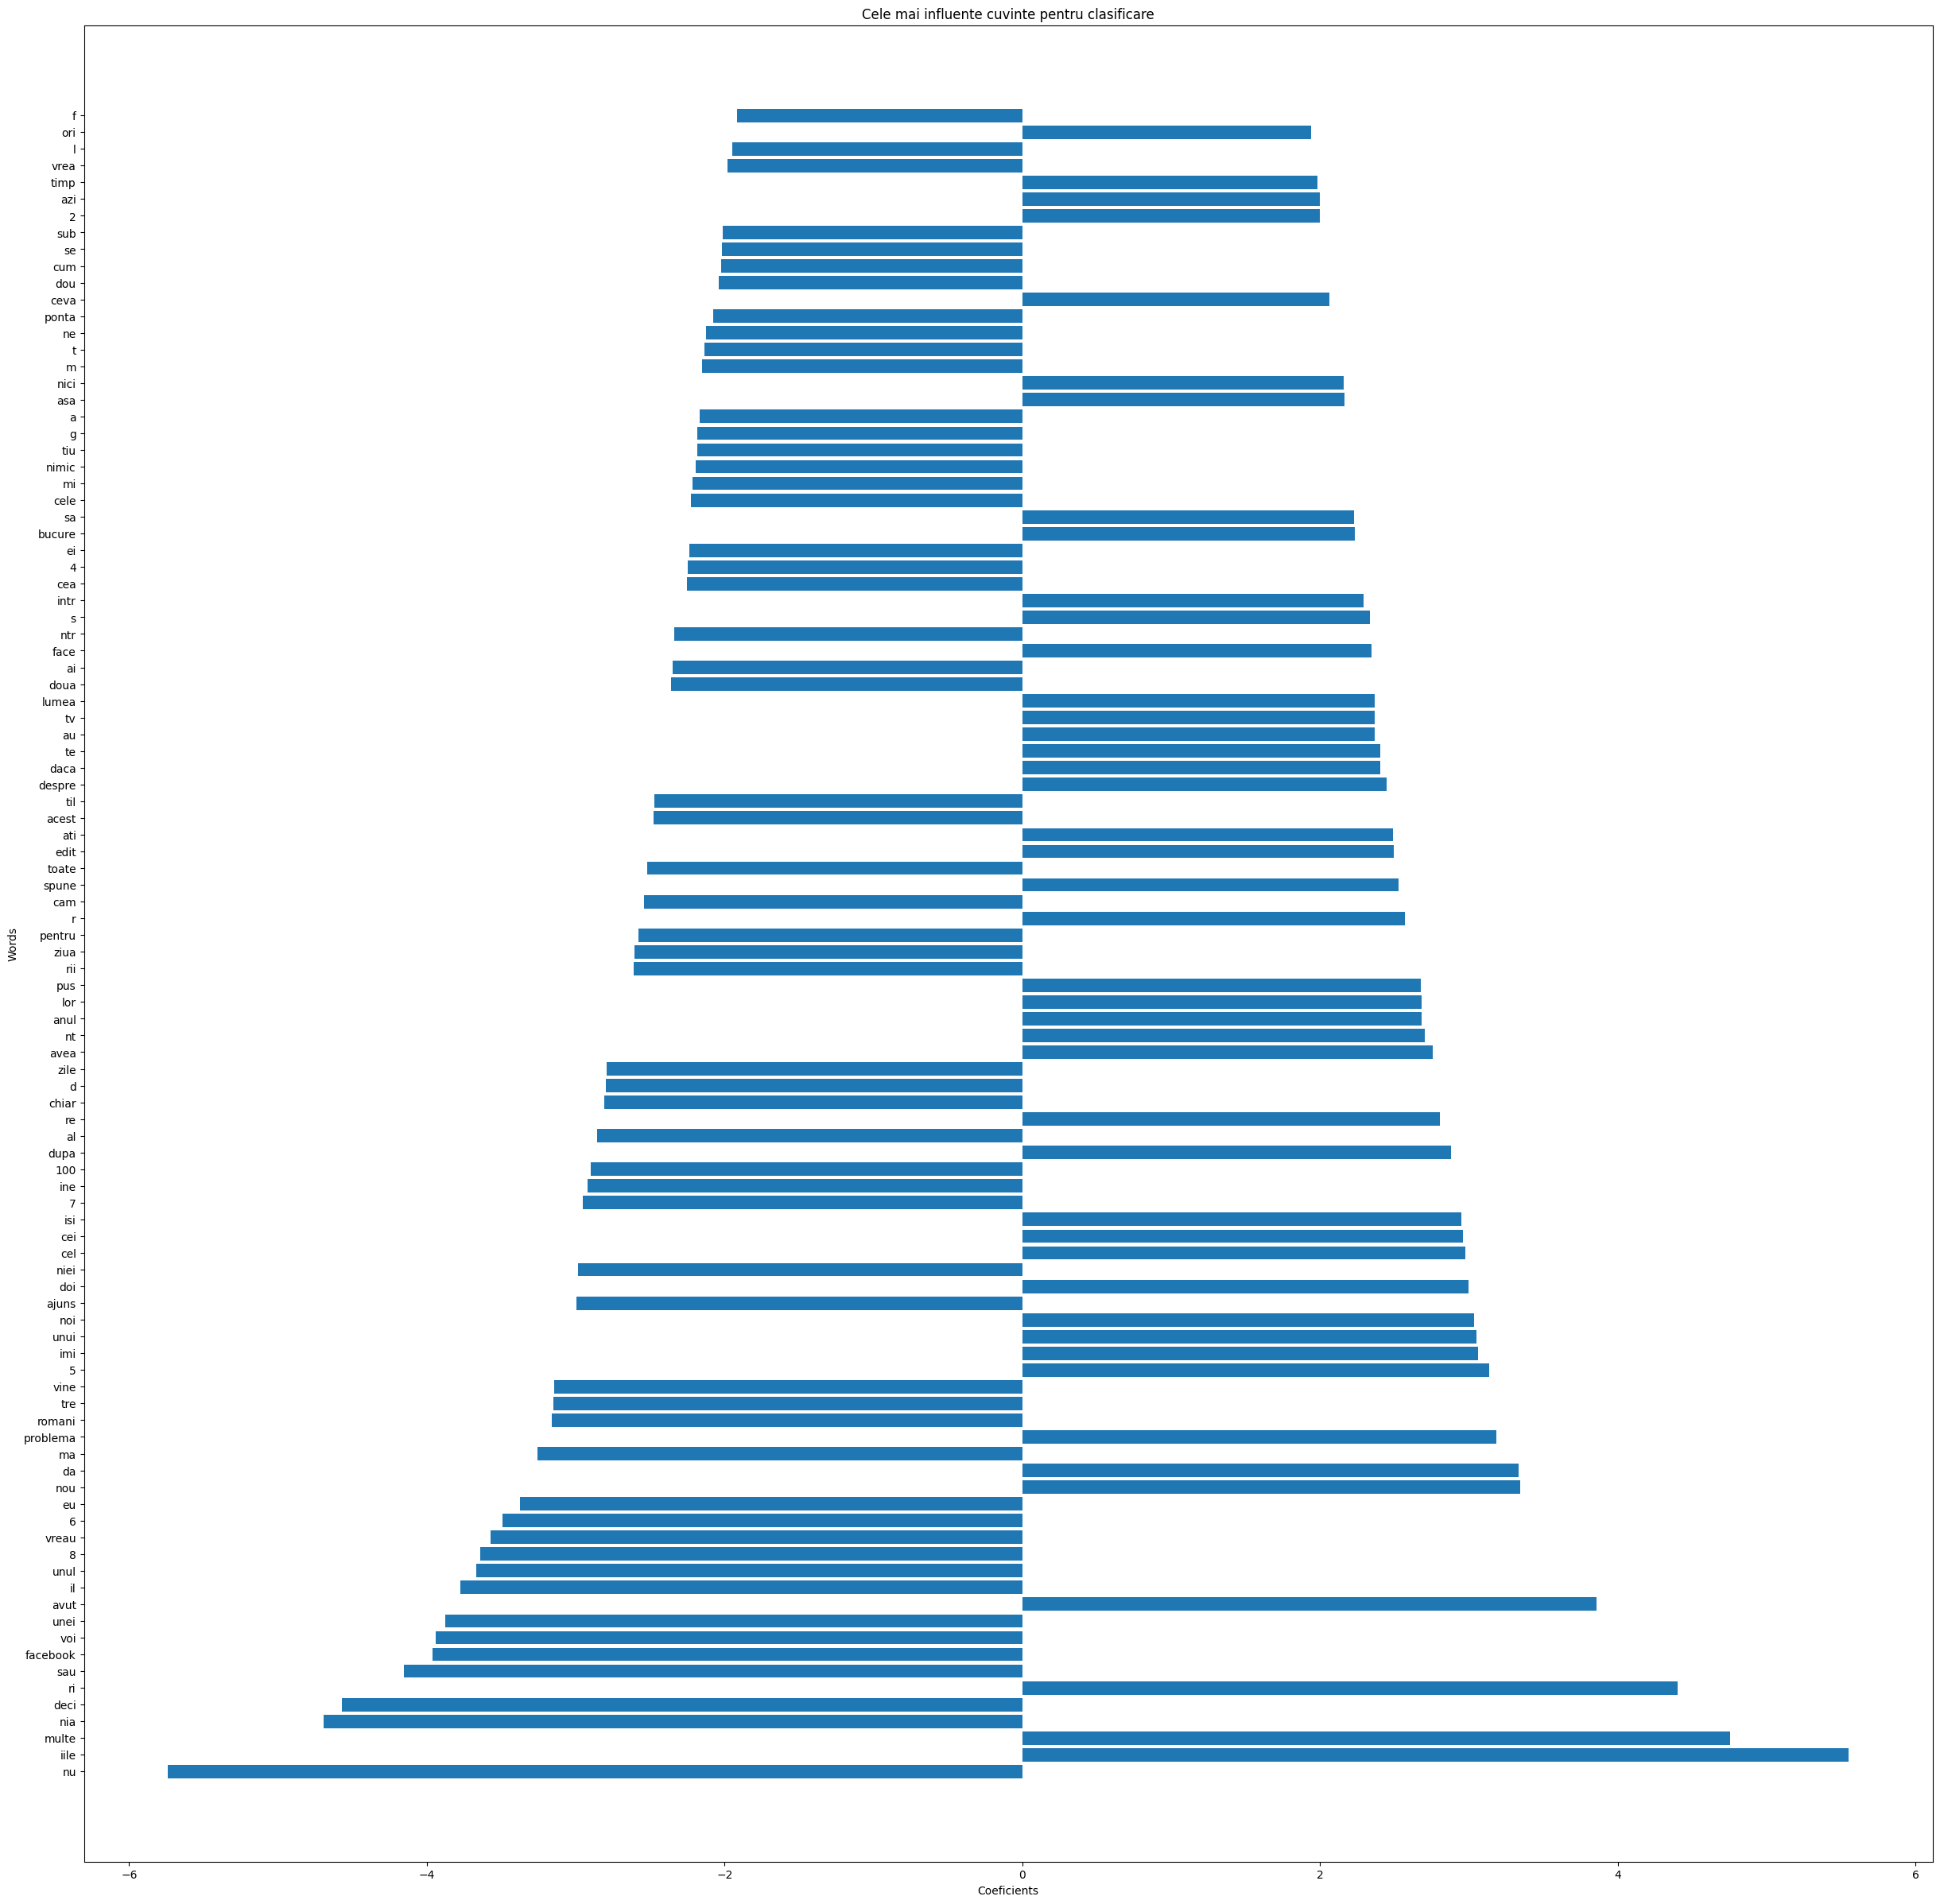

In [ ]:
weights = clf.coef_[0]

# Get the words corresponding to the embeddings.
words = fasttext_model.wv.index_to_key

# Create a dataframe of weights and words.
influential_words_df = pd.DataFrame(list(zip(words, weights)), columns=['words', 'weights'])

# for some examples in the test set, print the words with the highest weights
for i in range(10):
  print("Example ", i)
  print("Label: ", labels_test[i])
  print("Prediction: ", predictions_test[i])
  print("Text: ", contents_test[i])
  print("Words with highest weights: ")
  # print weight for each word
  print(influential_words_df[influential_words_df['words'].isin(contents_test_tokenized[i])].sort_values(by='weights', ascending=False))
  print("\n")

# Sort the DataFrame by the absolute values of weights for better visualization
influential_words_df['abs_weights'] = influential_words_df['weights'].abs()
influential_words_df = influential_words_df.sort_values(by='abs_weights', ascending=False)

# Plot the dataframe.
plt.figure(figsize=(30, 30))
plt.barh(influential_words_df['words'][:100], influential_words_df['weights'][:100])
plt.title('Cele mai influente cuvinte pentru clasificare')
plt.xlabel('Coeficients')
plt.ylabel('Words')
plt.show()